# Tensorflow Framework for Multi-class Text Classification

## BBC News Classification - 5 Class Problem

* Consists of 737 documents from the BBC Sport website corresponding to sports news articles in five topical areas from 2004-2005.
* Class Labels: 5 <br/>

    0 - Rugby <br/>
    1 - Tennis <br/>
    2 - Football <br/>
    3 - Cricket <br/>
    4 - Atheletics <br/>

## Reading Data

In [1]:
import sys
import numpy as np
import pandas as pd

sys.path.append("..")
pd.set_option('display.max_colwidth', -1)

In [2]:
df_train = pd.read_csv('../datasets/bbcsports/train.csv')
df_test = pd.read_csv('../datasets/bbcsports/test.csv')
df_score = pd.read_csv('../datasets/bbcsports/test_with_label.csv')
df_val = pd.read_csv('../datasets/bbcsports/dev.csv')
df_train.shape, df_test.shape, df_val.shape

((471, 3), (148, 2), (118, 3))

In [3]:
df_train.label.value_counts()

2    169
0    94 
3    79 
4    65 
1    64 
Name: label, dtype: int64

In [4]:
df_val.label.value_counts()

2    43
0    23
3    20
4    16
1    16
Name: label, dtype: int64

In [5]:
df_score.label.value_counts()

2    53
0    30
3    25
4    20
1    20
Name: label, dtype: int64

## Training (Bert | Electra) classifier with FrameWork

In [6]:
from classitransformers.report import metrics
from classitransformers.configs import Configs

from classitransformers.tfelectra import ElectraClassification #(for using Electra)

#from classitransformers.tfbert import BertClassification

## Set Configurations

* Pre-trained config filepath, vocab filepath and model checkpoint filepath
* labels list
* train, test and eval batch size
* max_seq_len - how long is the each text input sentence !!
* data_dir - data path folder (optional)
* output_dir - output path folder (optional)

In [7]:
# config = Configs(pretrained_model_dir = '../models/Bert_base',
#                  num_train_epochs = 3,
#                  train_batch_size = 16, 
#                  eval_batch_size = 8, 
#                  predict_batch_size = 8, 
#                  do_train = True, 
#                  do_eval = True, 
#                  label_list = ["0", "1", "2", "3", "4"], 
#                  max_seq_length = 256, 
#                  data_dir='../datasets/bbcsports/',
#                  output_dir = '../bert_output_bbcsports/')


# model = BertClassification(config)


config = Configs(pretrained_model_dir = '../models/Electra_base/',
              model_name='electra',
              num_train_epochs=3, 
              train_batch_size = 16,
              eval_batch_size = 8, 
              do_train = True, 
              do_eval = True, 
              label_list = ["0", "1", "2", "3", "4"],
              max_seq_length = 256,
              data_dir = "../datasets/bbcsports/", 
              output_dir = "../electra_output_sports/")

model = ElectraClassification(config) 

Config: model=electra, trial 1/1
data_dir ../datasets/bbcsports/
do_eval True
do_lower_case True
do_predict False
do_train True
embedding_size None
eval_batch_size 8
gcp_project None
init_checkpoint ../models/Electra_base/
iterations_per_loop 1000
keep_all_models True
label_list ['0', '1', '2', '3', '4']
layerwise_lr_decay 0.8
learning_rate 5e-05
log_examples False
master None
max_seq_length 256
model_hparam_overrides {}
model_name electra
model_size base
num_tpu_cores 1
num_train_epochs 3
num_trials 1
output_dir ../electra_output_sports/
predict_batch_size 8
pretrained_model_dir ../models/Electra_base/
save_checkpoints_steps 1000000
task_names ['textclassification']
tasks {'textclassification': {'type': 'classification', 'labels': ['0', '1', '2', '3', '4'], 'header': True, 'text_column': 1, 'label_column': 2}}
tpu_job_name None
tpu_name None
tpu_zone None
train_batch_size 16
use_tfrecords_if_existing False
use_tpu False
vocab_file ../models/Electra_base/vocab.txt
vocab_size 30522
warm

## Train Method

In [8]:
model.train()

Start training
Training for 90 steps
Building model...
Building complete
10/90 = 11.1%, SPS: 0.3, ELAP: 31, ETA: 4:10 - loss: 22.2336
20/90 = 22.2%, SPS: 0.4, ELAP: 48, ETA: 2:48 - loss: 19.4345
30/90 = 33.3%, SPS: 0.5, ELAP: 1:05, ETA: 2:10 - loss: 18.7599
40/90 = 44.4%, SPS: 0.5, ELAP: 1:22, ETA: 1:43 - loss: 6.0089
50/90 = 55.6%, SPS: 0.5, ELAP: 1:39, ETA: 1:19 - loss: 6.5244
60/90 = 66.7%, SPS: 0.5, ELAP: 1:56, ETA: 58 - loss: 0.8747
70/90 = 77.8%, SPS: 0.5, ELAP: 2:14, ETA: 38 - loss: 0.6737
80/90 = 88.9%, SPS: 0.5, ELAP: 2:31, ETA: 19 - loss: 0.1257
90/90 = 100.0%, SPS: 0.5, ELAP: 2:48, ETA: 0 - loss: 0.0573
90/90 = 100.0%, SPS: 0.5, ELAP: 2:50, ETA: 0
Training Finished
Start Evaluation
Evaluating textclassification
Loading dataset textclassification_dev
Existing tfrecords not found so creating
Writing example 0 of 118
Building model...
Building complete
textclassification: accuracy: 95.76 - loss: 0.11



## Test Methods

In [9]:
prediction = model.test()

Writing out predictions for [Task(textclassification)] test
Loading dataset textclassification_test
Existing tfrecords not found so creating
Writing example 0 of 148
Building model...
Building complete
Getting predictions for 148 textclassification examples (test)


**Testing a sentence, takes a list of sentences.**

In [10]:
model.text_inference(['Rodger Fedrer is one of the great tennis player. Rafael Nadal is very good player at clay court. They have combined won more than 30 grand slams till now.'])

Writing out predictions for [Task(textclassification)] infer
Loading dataset textclassification_infer
Existing tfrecords not found so creating
Writing example 0 of 1
Building model...
Building complete
Getting predictions for 1 textclassification examples (infer)


[array([0.04234521, 0.99357986, 0.14866598, 0.5092559 , 0.16855492],
       dtype=float32)]

## Export the checkpoint model to pb (protobuf) format

**In TensorFlow, the protbuf file contains the graph definition as well as the weights of the model. Thus, a pb file is all you need to be able to run a given trained model.**

Only support of Bert for now

In [11]:
# Currently does not have support for Electra

# model.export_model()

## Inferencing from Trained Pb Model

* This tensorflow format is used for deployment purpose.

In [12]:
# Not supported for Electra

# predictions = model.inference(test_filename = '../datasets/bbcsports/test.csv', batch_size = 256)

In [13]:
y_pred = [np.argmax(tup) for tup in prediction]
y = df_score.label

## Accuracy and Report



Accuracy: 0.993
Precision: 0.994
Recall: 0.996
F1-Score: 0.995


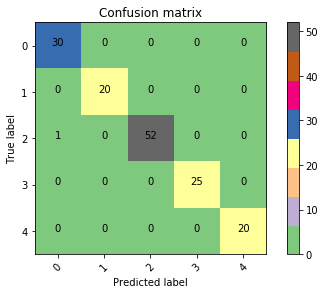

In [15]:
metrics(y, y_pred)